<IPython.core.display.Javascript object>


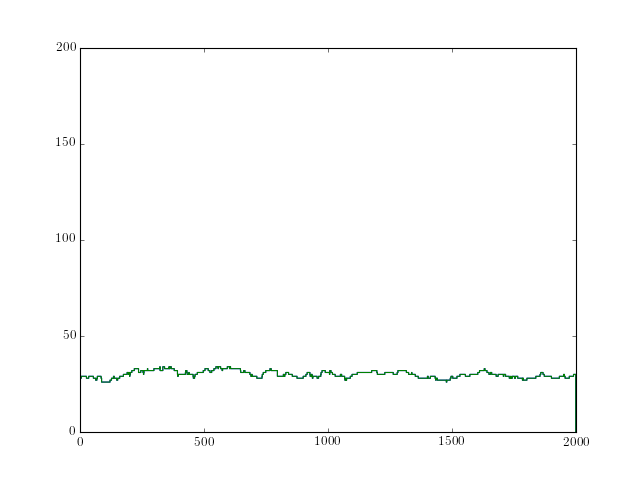

In [8]:
# Simulation of the PNG model
%matplotlib notebook
import matplotlib

from pylab import *

import matplotlib.animation as animation


# Set up to use LaTeX
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})


# Length of the system

L = 2000

# Make a random walk bridge with N steps up and N down
N = 50
#state = cumsum(randint(-2,high = 3, size = L))
#state1, state2 = state, state

state1, state2 = zeros(L), zeros(L)
sites = arange(L)


T = 2000
t = 0
NucRate = 10

state_history1 = [state1]
state_history2 = [state2]

while t < T:

    new_state1, new_state2 = list(state1), list(state2)
    # Can't write equality here because it would be the same list!
    
    for site, val in enumerate(delete(state1,L-1)):
        if state1[site+1] > val or state1[site-1] > val: 
            new_state1[site] = max(state1[site+1],state1[site-1])

    for site, val in enumerate(delete(state2,L-1)):
        if state2[site+1] > val or state2[site-1] > val: 
            new_state2[site] = max(state2[site+1],state2[site-1])
    
    # Introduce nucleation events 
        
    nuclei = randint(L, size = NucRate)    
    for nuc_site in nuclei:
        new_state1[nuc_site] += 1
        new_state2[nuc_site] += 1
    
    # Introduce the difference
    
    #if t == T / 10:
    #    new_state1[int(L/2)] += 10
    #    new_state2[int(L/2)] -= 10
        
    
    state1, state2 = new_state1, new_state2
    state_history1.append(new_state1)
    state_history2.append(new_state2)

    t += 1.

fig = figure()
ax = axes(ylim=(0,40), xlim=(0, L))
lines = [ax.step([], [], where  = 'post')[0], ax.step([], [], where  = 'post')[0]]

def init():
    ax.set_ylim(0,200)
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    anim_state1 = state_history1[i]
    anim_state2 = state_history2[i]
    lines[0].set_data(sites,anim_state1)
    lines[1].set_data(sites,anim_state2)
    ymin, ymax = ax.get_ylim()
    if max(anim_state1) > ymax:
        ax.set_ylim(ymin+30,ymax+30)
        ax.figure.canvas.draw()
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=T, interval = 10, blit=True)


In [9]:
anim.save('PNG.mp4', extra_args=['-vcodec', 'libx264', '-pix_fmt',
'yuv420p'])